#**Task**
 * Our goal is to develop a regression model that will predict the job's salary from the job ad's content. 
  

#**Dataset Description**

The main dataset consists of a large number of rows representing individual job ads, and a series of fields about each job ad.

 * **Id** - A unique identifier for each job ad.
 * **Title** - A freetext field supplied to us by the job advertiser as the Title of the job ad.  Normally this is a summary of the job title or role.
 * **FullDescription** - The full text of the job ad as provided by the job advertiser.  Where you see ***s, we have stripped values from the description in order to ensure that no salary information appears within the descriptions.  There may be some collateral damage here where we have also removed other numerics.
 * **LocationRaw** - The freetext location as provided by the job advertiser.
 * **LocationNormalized** - Adzuna's normalised location from within our own location tree, interpreted by us based on the raw location.  Our normaliser is not perfect!
 * **ContractType** - full_time or part_time, interpreted by Adzuna from description or a specific additional field we received from the advertiser.
 * **ContractTime** - permanent or contract, interpreted by Adzuna from description or a specific additional field we received from the advertiser.
 * **Company** - the name of the employer as supplied to us by the job advertiser.
 * **Category** - which of 30 standard job categories this ad fits into, inferred in a very messy way based on the source the ad came from.  We know there is a lot of noise and error in this field.
 * **SalaryRaw** - the freetext salary field we received in the job advert from the advertiser.
 * **SalaryNormalised(Target)** - the annualised salary interpreted by Adzuna from the raw salary.  Note that this is always a single value based on the midpoint of any range found in the raw salary.  This is the value we are trying to predict.
 * **SourceName** - the name of the website or advertiser from whom we received the job advert. 



# **Importing the librarys**

In [147]:
#-----------------------Regular Imports-----------------------------------------------------------#
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load
import numpy as np                                     # To work with arrays to perform mathematical operations
import pandas as pd                                    # TO work with Dataframes,data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns                                  # An advanced visualization library built on top of matplotlib
import matplotlib.pyplot as plt                        # Library used for visualization
import csv                                             # import the csv for reading a csv file 

#---------------------Pre-Processing---------------------------------------------------------------#
from sklearn.model_selection import train_test_split   # For splitting the dataset into train and test

#---------------------Importing the models---------------------------------------------------------#
from sklearn.ensemble import RandomForestRegressor     # Importing the Random Forest regressor

#----------------------Model Selection-------------------------------------------------------------#
from sklearn.model_selection import RandomizedSearchCV # Using the Randomized Search CV to find the best hyper-parameters

#---------------------Evaluation Metric------------------------------------------------------------#
from sklearn.metrics import mean_absolute_error        #  importing the evaluation metrics MAE


In [148]:
#df2 = pd.read_csv("Train_rev1.csv", delimiter="\t")
#df2
#df = pd.read_csv("Train_rev1.csv", header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')

**Note:** when your importing the data using pandas dataframe u might fallen with error,so Use this code to fix any errors you might often encounter. This might be helpful.

  * df2 = pd.read_csv("Train_rev1.csv", delimiter="\t")

  * df = pd.read_csv("Train_rev1.csv", header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')

  * df = pd.read_csv(csvfile, 
                 delimiter="\t", 
                 engine="python",
                 error_bad_lines=False,  
                 encoding='utf-8')

  * pandas.read_csv(filepath, sep=',', delimiter=None, 
            header='infer', names=None, 
            index_col=None, usecols=None, squeeze=False, 
            ..., engine=None, ...)

# **Importing the data**

In [149]:
df3 = pd.read_csv("Train_rev1.csv") # importing the dataset using pandas 242945 rows
df3

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
...,...,...,...,...,...,...,...,...,...,...,...,...
244763,72705211,TEACHER OF SCIENCE,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244764,72705212,TEACHER OF BUSINESS STUDIES AND ICT,Position: Qualified Teacher or NQT Subject/Spe...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244765,72705213,ENGLISH TEACHER,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244766,72705216,SUPPLY TEACHERS,Position: Qualified Teacher Subject/Specialism...,Wiltshire,Wiltshire,NaN,contract,NaN,Teaching Jobs,450 to 500 per week,22800,hays.co.uk


In [150]:
df3.head() # checking the first five row

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [151]:
df3.tail() # checking the last five row

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
244763,72705211,TEACHER OF SCIENCE,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244764,72705212,TEACHER OF BUSINESS STUDIES AND ICT,Position: Qualified Teacher or NQT Subject/Spe...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244765,72705213,ENGLISH TEACHER,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244766,72705216,SUPPLY TEACHERS,Position: Qualified Teacher Subject/Specialism...,Wiltshire,Wiltshire,NaN,contract,NaN,Teaching Jobs,450 to 500 per week,22800,hays.co.uk
244767,72705235,Accountant,This entrepreneurial and growing private equit...,Hitchin,Hitchin,NaN,permanent,NaN,Teaching Jobs,"40-45,000",42500,hays.co.uk


# **Data understanding** 

In [152]:
df3.shape # checking the shape of the data

(244768, 12)

In [153]:
df3.columns # checking the features

Index(['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized',
       'ContractType', 'ContractTime', 'Company', 'Category', 'SalaryRaw',
       'SalaryNormalized', 'SourceName'],
      dtype='object')

In [154]:
df3.info() # obtain the summary of the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


In [155]:
df3.describe()

,Id,SalaryNormalized
count,2.447680e+05,244768.000000
mean,6.970142e+07,34122.577576
std,3.129813e+06,17640.543124
min,1.261263e+07,5000.000000
25%,6.869550e+07,21500.000000
50%,6.993700e+07,30000.000000
75%,7.162606e+07,42500.000000
max,7.270524e+07,200000.000000


# **Exploratory data analysis**

In [156]:
len(df3["Title"].unique()) # taking the unique job role in the advertisement

135436

* **There are 135436 different job role are advertise**.

In [157]:
df3["Title"].value_counts()[:30] # 30 popular job role

Business Development Manager      921
Project Manager                   749
Management Accountant             661
Sales Executive                   603
Account Manager                   540
Mechanical Design Engineer        459
Finance Manager                   458
Cleaner                           439
Credit Controller                 439
Accounts Assistant                435
Administrator                     428
Recruitment Consultant            423
Assistant Manager                 398
Financial Controller              387
Sales Manager                     361
Business Analyst                  354
Quality Engineer                  311
Marketing Manager                 288
Quantity Surveyor                 280
Project Engineer                  279
Store Manager                     273
Support Worker                    273
Financial Accountant              269
Assistant Accountant              264
Design Engineer                   256
Business Development Executive    244
Marketing Ex

In [158]:
len(df3["LocationNormalized"].unique()) # Unique location

2732

* **In the data set, there are 2732 distinct locations.**

In [159]:
df3["LocationNormalized"].value_counts()[:50] # 50 popular loaction

UK                     41093
London                 30522
South East London      11713
The City                6678
Manchester              3516
Leeds                   3401
Birmingham              3061
Central London          2607
West Midlands           2540
Surrey                  2397
Reading                 2187
Bristol                 2085
Nottingham              1873
Sheffield               1766
Aberdeen                1634
Hampshire               1557
Belfast                 1537
East Sheen              1531
Milton Keynes           1523
Berkshire               1502
Oxford                  1497
Newcastle Upon Tyne     1390
Liverpool               1341
Kent                    1333
Cambridge               1301
Leicester               1219
North West London       1104
Guildford               1082
West Yorkshire          1072
Hertfordshire           1039
Glasgow                 1037
Oxfordshire             1035
Northampton             1023
Scotland                 984
Essex         

In [160]:
df3["ContractTime"].value_counts() # job's type 

permanent    151521
contract      29342
Name: ContractTime, dtype: int64

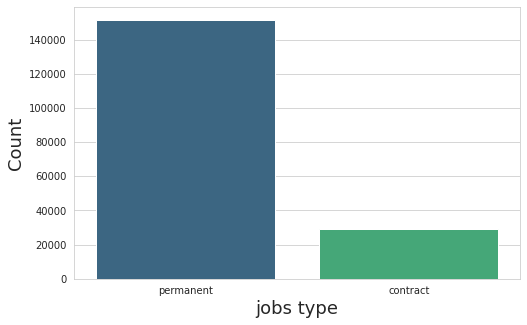

In [161]:
# Countplot for the feature 'diagnosis' 

plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='ContractTime', data=df3, palette='viridis')
plt.ylabel('Count', fontsize = 18)
plt.xlabel('jobs type', fontsize = 18);

* **This US data shows that there are more "permanent" job advertising than "contract" job ads.**

In [163]:
len(df3["Company"].unique())

20813

* **There are 20813 comapny name are presented in this dataset.**

In [164]:
df3["Company"].value_counts()[:30] # 30 popular comapny names

UKStaffsearch                     4997
CVbrowser                         2977
London4Jobs                       2345
Hays                              1784
JAM Recruitment Ltd               1122
Office Angels                      961
Jobsite Jobs                       932
Perfect Placement                  865
ARRAY                              847
JOBG8                              841
Matchtech Group plc.               834
Penguin Recruitment                752
Randstad                           748
Adecco                             701
Michael Page Finance               634
Adecco Group                       592
BMS Sales Specialists LLP          559
COREcruitment International        551
Page Personnel Finance             536
Capita Resourcing                  495
Michael Page Sales                 486
Matchtech                          474
Rise Technical Recruitment Ltd     460
Experis IT                         446
ATA Recruitment                    438
Huxley Associates        

In [165]:
print(len((df3['Category'].unique()))) # There are 29 different jobs are advertised

29


<Axes: >

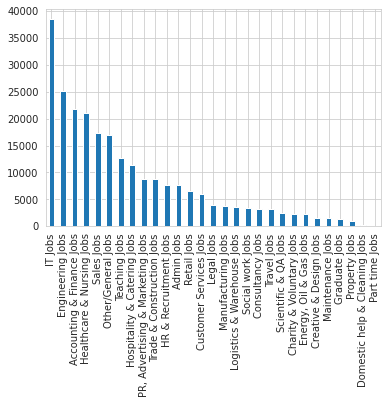

In [166]:
df3["Category"].value_counts().plot(kind='bar') 

* **In this data, the majority of the job postings are for IT positions, engineering, accounting, healthcare, and sales-related employment. The number of graduate, property, and part-time jobs advertised is quite low.**

<Axes: >

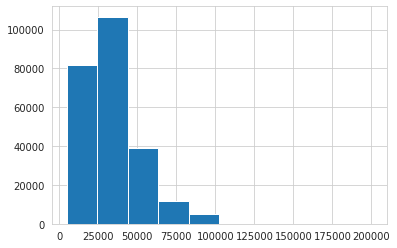

In [167]:
df3["SalaryNormalized"].hist() # plotting the hist plot salarynormalized(target)

# **Data pre-procesing**

**(I) Checking the NULL values** 


In [168]:
df3.isna().sum() # checking the null values

Id                         0
Title                      1
FullDescription            0
LocationRaw                0
LocationNormalized         0
ContractType          179326
ContractTime           63905
Company                32430
Category                   0
SalaryRaw                  0
SalaryNormalized           0
SourceName                 1
dtype: int64

* The data sets include a significant number of **NULL values**. Hence, the futures will handle the NULL values.

  **(II) Check for string label**

This code iterates over the columns of a pandas DataFrame called df_train, and for each column it checks if the column's data type is a string using the pd.api.types.is_string_dtype() function.

If the column's data type is a string, the code prints the label of the column, which is the column name, to the console. This is useful for identifying which columns in the DataFrame contain string data.

In [169]:
# The **For** loop is first created, and if the data type is **string**, the labels are then printed.
for label,content in df3.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Title
FullDescription
LocationRaw
LocationNormalized
ContractType
ContractTime
Company
Category
SalaryRaw
SourceName


* **There are 10 varibles are presented.**

**(III) checking the numerical varibles**

In [170]:
# The **For** loop is first created, and if the data type is **numeric**, the labels are then printed.
for label,content in df3.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
SalaryNormalized


* **There are two numerical varibles are presented.**

**(IV) Now converting all of the string value into category values**

This code iterates over the columns of a pandas DataFrame called df3, and for each column it checks if the column's data type is a string using the "pd.api.types.is_string_dtype()" function.

If the column's data type is a string, the code converts the column to a pandas "category" data type using the "astype()" method, and then sets the category as ordered using the "cat.as_ordered()" method.

In [171]:
for label, content in df3.items():
    if pd.api.types.is_string_dtype(content):
        df3[label] = content.astype("category").cat.as_ordered()

In [172]:
df3.info() # after converting category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Id                  244768 non-null  int64   
 1   Title               244767 non-null  category
 2   FullDescription     244768 non-null  category
 3   LocationRaw         244768 non-null  category
 4   LocationNormalized  244768 non-null  category
 5   ContractType        65442 non-null   category
 6   ContractTime        180863 non-null  category
 7   Company             212338 non-null  category
 8   Category            244768 non-null  category
 9   SalaryRaw           244768 non-null  category
 10  SalaryNormalized    244768 non-null  int64   
 11  SourceName          244767 non-null  category
dtypes: category(10), int64(2)
memory usage: 28.3 MB


**(V) Filling missing values**

In [173]:
for label,content in df3.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df3[label+"is_missing"]=pd.isnull(content)
        # Turn categories into numbers and add+1
        df3[label] = pd.Categorical(content).codes+1 #It converts the categorical data in the column to numerical codes using the pd.Categorical(content).codes function.
# This assigns a unique integer to each category in the column.It adds 1 to the numerical codes generated in step 4. 
#This is done to avoid assigning 0 to any category since 0 may be interpreted as a missing value or null value in some cases

In [174]:
df3.isna().sum() # after filling the null values

Id                              0
Title                           0
FullDescription                 0
LocationRaw                     0
LocationNormalized              0
ContractType                    0
ContractTime                    0
Company                         0
Category                        0
SalaryRaw                       0
SalaryNormalized                0
SourceName                      0
Titleis_missing                 0
FullDescriptionis_missing       0
LocationRawis_missing           0
LocationNormalizedis_missing    0
ContractTypeis_missing          0
ContractTimeis_missing          0
Companyis_missing               0
Categoryis_missing              0
SalaryRawis_missing             0
SourceNameis_missing            0
dtype: int64

**(VI) copy train datasets**

In [175]:
df_copy = df3.copy() # copying the train data

In [176]:
df_copy.head() # once the categorical has been converted to numbers

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,...,Titleis_missing,FullDescriptionis_missing,LocationRawis_missing,LocationNormalizedis_missing,ContractTypeis_missing,ContractTimeis_missing,Companyis_missing,Categoryis_missing,SalaryRawis_missing,SourceNameis_missing
0,12612628,39227,68301,5178,751,0,2,7758,9,21344,...,False,False,False,False,True,False,False,False,False,False
1,12612830,121388,196351,6881,987,0,2,7758,9,32427,...,False,False,False,False,True,False,False,False,False,False
2,12612844,73486,117824,7630,1069,0,2,7758,9,21539,...,False,False,False,False,True,False,False,False,False,False
3,12613049,39228,68300,17183,2310,0,2,7758,9,31840,...,False,False,False,False,True,False,False,False,False,False
4,12613647,85435,157839,17183,2310,0,2,7758,9,21344,...,False,False,False,False,True,False,False,False,False,False


# **Model Preparation**

**(I) Split the data into X and Y**

In [177]:
X = df_copy.drop(columns=["SalaryNormalized"],axis=1) # We are dropping "SalaryNormalized" because this is the variable we are aiming for.
y = df_copy["SalaryNormalized"]                       # Our target varible

In [178]:
X

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,...,Titleis_missing,FullDescriptionis_missing,LocationRawis_missing,LocationNormalizedis_missing,ContractTypeis_missing,ContractTimeis_missing,Companyis_missing,Categoryis_missing,SalaryRawis_missing,SourceNameis_missing
0,12612628,39227,68301,5178,751,0,2,7758,9,21344,...,False,False,False,False,True,False,False,False,False,False
1,12612830,121388,196351,6881,987,0,2,7758,9,32427,...,False,False,False,False,True,False,False,False,False,False
2,12612844,73486,117824,7630,1069,0,2,7758,9,21539,...,False,False,False,False,True,False,False,False,False,False
3,12613049,39228,68300,17183,2310,0,2,7758,9,31840,...,False,False,False,False,True,False,False,False,False,False
4,12613647,85435,157839,17183,2310,0,2,7758,9,21344,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244763,72705211,123566,159877,17363,2329,0,1,0,27,59081,...,False,False,False,False,True,False,True,False,False,False
244764,72705212,123556,159879,17363,2329,0,1,0,27,59081,...,False,False,False,False,True,False,True,False,False,False
244765,72705213,36446,159864,17363,2329,0,1,0,27,59081,...,False,False,False,False,True,False,True,False,False,False
244766,72705216,103002,159865,19775,2643,0,1,0,27,59104,...,False,False,False,False,True,False,True,False,False,False


**(II) train and test split**

In [179]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) # We are splittiing data the 75:25 ratio in this case.

**(III) Building Random Forest Regression**

In [180]:
model = RandomForestRegressor(n_jobs=-1) # creating the instance

**(IV) fitting the model**

In [181]:
model.fit(X_train,y_train) # fitting the train data

RandomForestRegressor(n_jobs=-1)

**(V) Evaluation of the model**
* evaluating the model using **Mean Absolute Error**(Note: The evolution metrics were mentioned the competition itself)

**Mean Absolute Error (MAE)**

* The Mean Absolute Error (MAE) measures the average absolute magnitude between the actual values and the predicted values by regression modelc,

                     MAE = (1/n) * Σ|yi — xi|
* n = total numbers of observation
* yi = actual value for the ith observation
* xi = predicted value for the ith observation

In [184]:
y_pred = model.predict(X_test)

In [185]:
mae_rand_forest = mean_absolute_error(y_test,y_pred) # checking the model preformance

In [186]:
print(mae_rand_forest)

1777.5512464047588


* **The model predicts more reliably in general the lower the MAE. This result was obtained before hyper parameter tuning: Mean Absolute Error = 1777.5512.**

**(VI) Hyerparameter tuning with RandomizedSearchCV**

In [187]:
# selecting the best parameters with the randomizedsearchcv
np.random.seed(42) 
grid = {
    "n_estimators":np.arange(10,100,10),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
    "max_features": [0.5,1,"sqrt","auto"],
    "max_samples":[10000,12000,15000,20000]
}

In [188]:
# creating the instance
rs_model = RandomizedSearchCV(
RandomForestRegressor(n_jobs=-1,
                     random_state=42),
                    param_distributions = grid,
                     n_iter=5,
                    cv=5,
                    verbose=True)

**(VII) Fit RandomizedSearchCV Model**

In [189]:
rs_model.fit(X_train,y_train) # fitting the model after specify the hyperparamerter

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors an

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000, 12000, 15000,
                                                        20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [190]:
rs_model.best_params_ # best parameters for this data

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 12000,
 'max_features': 0.5,
 'max_depth': None}

**(VIII) Choose the best performance on the model**

In [191]:
y_preds_rs = rs_model.predict(X_test) # predicting the x_test data

**(XI) Evaluation of this model**

In [192]:
mae_hyp = mean_absolute_error(y_test,y_preds_rs) # calulating the MAE

In [193]:
mae_hyp,mae_rand_forest # comparing model performance the before hyperparameter tuning and after hyper parameter tuning

(4726.8647237056075, 1777.5512464047588)

* **After comparing the model performance with and without hyperparameter tuning, it was found that the model without hyperparameter tuning had less error than the model with hyperparameter tuning. As a result, this model will be used to test the original test data.** 

#**Make predictions using new test data**

* Note: **No target variable is present in this data.**

**(I) Importing the test data**

In [194]:
df_test = pd.read_csv("Test_rev1.csv") # Importing the test data

In [195]:
df_test.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SourceName
0,11888454,Business Development Manager,The Company: Our client is a national training...,"Tyne Wear, North East",Newcastle Upon Tyne,NaN,permanent,Asset Appointments,Teaching Jobs,cv-library.co.uk
1,11988350,Internal Account Manager,The Company: Founded in **** our client is a U...,"Tyne and Wear, North East",Newcastle Upon Tyne,NaN,permanent,Asset Appointments,Consultancy Jobs,cv-library.co.uk
2,12612558,Engineering Systems Analysts,Engineering Systems Analysts Surrey ****K Loca...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,cv-library.co.uk
3,12613014,CIS Systems Engineering Consultant,CIS Systems Engineering Consultant Bristol So...,"Bristol, South West, South West",Bristol,NaN,permanent,Gregory Martin International,Engineering Jobs,cv-library.co.uk
4,22454872,CNC Miller / Programmer Fanac,"CNC Miller / Programmer Fanac Fleet, Hampshire...","Fleet, Hampshire",Fleet,NaN,permanent,Gregory Martin International,Manufacturing Jobs,cv-library.co.uk


**(II) Checking for missing values on df_test dataset.**( We must undertake all pre - processing steps in the test data that we did in the train data.)

In [196]:
df_test.isna().sum() # null value check

Id                        0
Title                     0
FullDescription           0
LocationRaw               0
LocationNormalized        0
ContractType          89450
ContractTime          31761
Company               16261
Category                  0
SourceName                0
dtype: int64

**(III) Check for string label**

In [197]:
# The **For** loop is first created, and if the data type is **string**, the labels are then printed.
for label,content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Title
FullDescription
LocationRaw
LocationNormalized
ContractType
ContractTime
Company
Category
SourceName


* There are 9 varible are presented

**(IV) checking the numerical varibles**

In [198]:
# The **For** loop is first created, and if the data type is **numeric**, the labels are then printed.
for label,content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id


**(V) Now converting all of the string value into category values**

In [199]:
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

**(VI) Filling missing values**

In [200]:
for label,content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_test[label+"is_missing"]=pd.isnull(content)
        # Turn categories into numbers and add+1
        df_test[label] = pd.Categorical(content).codes+1

**(VII) Now Reshape X_train & df_test**

* Assuming that "X_train" and "df_test" are both Pandas dataframes, this code is taking the set of column names in "X_train" and subtracting the set of column names in df_test. In other words, it's finding the names of any columns in X_train that are not present in df_test.

* The result of this operation is a set of column names that are present in "X_train" but not in "df_test." This information could be useful for identifying any columns in the training data that are not present in the test data, which could be important for ensuring that any machine learning models built using the training data can be properly applied to new data.

In [201]:
set(X_train.columns)-set(df_test.columns) # checking the columns that are not presented in test data, so we need add this columns beacuse we are train our data using this columns

{'SalaryRaw', 'SalaryRawis_missing'}

In [202]:
# Adding the two colunms, beacuse this two columns that are not present in the new test data
df_test["SalaryRaw"] = False
df_test["SalaryRawis_missing"] = False

In [203]:
X_train.shape,df_test.shape # checking the shape colums, here both x_train and df_test are same shape

((183576, 21), (122463, 21))

In [204]:
# reorder the columns
df_re_order = df_test.reindex(columns=["Id","Title","FullDescription","LocationRaw","LocationNormalized","ContractType","ContractTime","Company","Category",
                              "SalaryRaw","SourceName","Titleis_missing","FullDescriptionis_missing",
                              "LocationRawis_missing","LocationNormalizedis_missing","ContractTypeis_missing","ContractTimeis_missing",
                              "Companyis_missing","Categoryis_missing","SalaryRawis_missing","SourceNameis_missing"])

**Note: we need to reorder the columns, because the order of the columns in the "X_train" data differ from the new "df_test" order. In this case "SalaryRaw and "SourceName" order was changed. so we need the ensuring that any machine learning models built using the training data can be properly applied to new data.If you not,you might trap into the error.**

           **ValueError:** The feature names should match those that were passed during fit.Feature names must be in the same order as they were in fit.

**(VIII) Make predictions**

In [205]:
y_preds = model.predict(df_re_order) # predicting the new df_test data using our train model.

In [206]:
df_preds = pd.DataFrame()  # craeting a data frame

In [207]:
# craeting a columns name 
df_preds["Id"] = df_re_order["Id"]
df_preds["SalaryNormalized"] = y_preds

In [208]:
df_preds.head() 

,Id,SalaryNormalized
0,11888454,33514.36
1,11988350,30738.89
2,12612558,28333.75
3,12613014,30963.78
4,22454872,26599.94


**In the above table based on the "job Advertis Id" our model will predict the salary of the job Role. Now our model ready for the deployment**